# K-Nearest Neightbor
## Alfian Badrul Isnan - 1806148643

KNN Merupakan sebuah algoritma kalisifikasi yang sederhana tetapi sangat bagus untuk digunakan pada Machine Learning. Pada percobaan kali ini kita akan menggunakan data Iris untuk melakukan training klasifikasi terhadap data tersebut kemudian melakukan test apakah dengan menggunakan KNN ini menghasilkan data yang valid atau tidak. Algoritma ini didasari oleh posisi terdekat kulit K terhadap test pada data klasifikasi. Nilai k ini sebaiknya di tentukan terlebih dahulu untuk mendapatkan hasil terbaik. Pada proses klasifikasinya, kalkulasi menggunakan algoritma KNN yang telah disediakan pada inbuilt function oleh sklearn

Bagian dibawah ini merupakan sintaks dari persiapan data Iris dan library yang digunakan.

In [1]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Pada data iris, terdapat empat feature yang terbagi didalam tiga jenis bunga yang tersedia. feature tersebut diantaranya selap_length, sepal_width, petal_length, dan petal_width

In [29]:
train=pd.read_excel(r"..\dataset\dataset.xlsx", sheet_name = 'train').iloc[:,1:]
test=pd.read_excel(r"..\dataset\dataset.xlsx", sheet_name = 'test').iloc[:,1:]

In [31]:
train.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,3,6,4,4,2,6,12,2,7,11,9,4,1,11,2,5
1,T,6,8,6,6,3,4,12,3,8,12,10,4,1,10,2,5
2,T,2,1,3,2,1,6,12,3,6,8,11,7,2,11,1,7
3,T,10,14,8,8,4,7,8,3,10,13,6,6,2,9,5,5
4,T,5,10,7,7,8,6,8,4,6,7,6,9,5,8,5,6


In [32]:
test.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,7,9,8,8,8,6,8,3,9,8,7,9,3,8,8,6
1,T,3,3,4,2,2,6,11,3,7,11,9,5,1,11,3,4
2,T,3,8,5,6,4,6,11,2,7,8,11,8,2,12,1,7
3,T,4,8,5,6,4,6,11,3,7,8,11,8,2,12,1,7
4,T,5,10,7,8,6,6,7,7,7,8,9,8,4,9,7,7


In [33]:
train.describe()

,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.00000
mean,3.999716,7.015687,5.097524,5.349839,3.484785,6.896617,7.491022,4.598469,5.201096,8.310244,6.443300,7.938386,3.013986,8.332829,3.692308,7.81100
std,1.897352,3.299718,2.005930,2.250684,2.187788,2.038540,2.328204,2.667096,2.380180,2.489567,2.621213,2.082275,2.336213,1.552404,2.567382,1.60615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000


In [34]:
test.describe()

,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,10582.000000,10582.000000,10582.000000,10582.00000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,4.041864,7.054527,5.136269,5.39312,3.515498,6.895861,7.492723,4.647704,5.183047,8.262899,6.440654,7.965035,3.050936,8.335286,3.716027,7.807031
std,1.933945,3.315806,2.030518,2.27536,2.191282,2.027671,2.311057,2.724239,2.398895,2.498097,2.625477,2.072978,2.328059,1.526640,2.583190,1.620618
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.000000
max,15.000000,15.000000,15.000000,14.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


Pada uji coba yang akan dilaksanakan, data iris akan dibagi kedalam dua dataset yaitu untuk dataset training dan dataset testing. data set ini dibagi dengan rasio (training)7:3(testing) yang diambil dari setiap kelasnya

In [35]:
print("Total Data Training {0}".format(train.letter.count()))
print("Total Kelas {0} : {1}".format((train.letter.unique()).size,train.letter.unique()))
print("Total Data Testing {0}".format(test.letter.count()))
print("Total Kelas {0} : {1}".format((test.letter.unique()).size,test.letter.unique()))

Total Data Training 10582
Total Kelas 26 : ['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']
Total Data Testing 10582
Total Kelas 26 : ['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']


dibawah ini adalah fungsi untuk mendapatkan parameter nilai K yang optimal, uji coba ini dilakukan agar nilai akurasi mendapatkan hasil terbaik dengan error yang kecil sehingga prediksi menghasilkan hasil yang bagus. Pencarian nilai K ini adalah dengan melakukan iterasi sebanyak list neighbor kemudian dicari error klaisifikasinya yang akan dihitung dengan mendapatkan nilai error terkecil untuk dijadikan acuan nilai k optimal.

In [36]:
def optimal_k(x_train, y_train):
    cv_scores = []
    neighbors = list(np.arange(3,50,2))
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors = n,algorithm = 'brute')
        cross_val = cross_val_score(knn,x_train,y_train,cv = 5 , scoring = 'accuracy')
        cv_scores.append(cross_val.mean())
    error = [1-x for x in cv_scores]
    optimal_n = neighbors[ error.index(min(error)) ]
    print("Nilai K-Optimal adalah {0}".format(optimal_n))
    return optimal_n

dibawah ini merupakan definisi pembentukan klasifikasi menggunakan KNN dengan algoritma brute. Karena menggunakan library, klasifikasi ini cukup dengan memanggil fungsi KNeighborsClassifier yang disediakan oleh modul sklearn. dari hasil classifier ini kita juga akan mendapatkan nilai akurasi tersebut pada K yang ditentukan, kemudian diperlihatkan juga laporan klasifikasi dan Heat Map yang terbentuk dari proses klasifikasi dengan nilai k tersebut.

In [37]:
def classifier(k_value, show, x_train, y_train, x_test, y_test):
    knn_optimal = KNeighborsClassifier(n_neighbors = k_value, algorithm = 'brute')
    cross_val = cross_val_score(knn_optimal,x_train,y_train,cv = 5 , scoring = 'accuracy')
    err = (cross_val.mean())*100
    knn_optimal.fit(x_train,y_train)
    pred = knn_optimal.predict(x_test)
    acc = accuracy_score(y_test,pred)*100
    if(show):
        print("Nilai akurasi untuk K = {0} adalah {1}".format(k_value,acc))
        print("classification_report")
        print(classification_report(y_test,pred))
        cm = confusion_matrix(y_test, pred)
        cm_df = pd.DataFrame(cm,
                             index = y_train.letter.unique(), 
                             columns = y_train.letter.unique())
        plt.subplots(figsize=(18, 15))
        sns.heatmap(cm_df, annot=True, cmap="YlGnBu",fmt='.2f',
                 linewidths=.05)
        plt.title('Nilai akurasi {0:.3f}'.format(accuracy_score(y_test, pred)))
        plt.ylabel('Aktual')
        plt.xlabel('Prediksi')
        plt.show()
    return acc,err

proses dibawah ini adalah untuk mendapatkan return berupa Akurasi dan Error yang dibentuk oleh KNN dengan variasi nilai K dari 1 sampai 85 terbentuk dalam array data.

In [ ]:
xtrain = train.iloc[:,1:]
ytrain = train.iloc[:,:1]
xtest = train.iloc[:,1:]
ytest = train.iloc[:,:1]
#
data = []
for k in range(1,85):
    print("Process on : " + str(k))
    data.append(classifier(k, False, xtrain, ytrain, xtest, ytest))
print(x_train)
print(y_train)

Process on : 1
Process on : 2
Process on : 3
Process on : 4
Process on : 5
Process on : 6
Process on : 7
Process on : 8
Process on : 9
Process on : 10
Process on : 11
Process on : 12
Process on : 13
Process on : 14
Process on : 15
Process on : 16
Process on : 17
Process on : 18
Process on : 19
Process on : 20
Process on : 21
Process on : 22
Process on : 23
Process on : 24
Process on : 25
Process on : 26
Process on : 27
Process on : 28
Process on : 29
Process on : 30
Process on : 31
Process on : 32
Process on : 33
Process on : 34
Process on : 35
Process on : 36
Process on : 37
Process on : 38
Process on : 39
Process on : 40
Process on : 41
Process on : 42
Process on : 43
Process on : 44
Process on : 45
Process on : 46
Process on : 47
Process on : 48
Process on : 49
Process on : 50
Process on : 51
Process on : 52
Process on : 53
Process on : 54
Process on : 55
Process on : 56
Process on : 57
Process on : 58
Process on : 59
Process on : 60
Process on : 61
Process on : 62
Process on : 63
P

Pada diagram dibawah ini terlihat bahwa semakin nilai K bernilai tinggi maka proses klasifikasi akan bernilai error, dan nilai prediksi juga turun. dari data tersebut kita akan dapat mencari tahu nilai K terbaik untuk membentuk klasifikasi KNN ini.

In [ ]:
plt.plot(data)
plt.xlabel("Nilai K")
plt.legend(["Akurasi","Error"])
plt.show()

dibawah ini adalah proses klasifikasi dengan menggunakan variasi nilai K, dengan menggunakan fungsi pencari nilai k optimal, maka didapatkan nilai K optimalnya adalah 17 sehingga saat KNN dengan nilai K tersebut menghasilkan akurasi sekitar 97.8% dan hasil prediksinya ditunjukkan juga pada heat map.
Untuk percobaan kedua dan ketiga adalah dengan melakukan variasi terhadap nilai K dengan nilai 60 dan 80 dan menghasilkan penurunan akurasi dan hasil prediksinya juga dapat dilihat pada heatmap.

In [67]:
optimal_k(xtrain, ytrain)

Nilai K-Optimal adalah 3


3

Nilai akurasi untuk K = 3 adalah 97.42014742014742
classification_report
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       407
           B       0.91      0.97      0.94       407
           C       0.97      0.99      0.98       407
           D       0.91      0.98      0.95       407
           E       0.96      0.96      0.96       407
           F       0.95      0.97      0.96       407
           G       0.97      0.98      0.97       407
           H       0.94      0.92      0.93       407
           I       1.00      0.98      0.99       407
           J       0.98      0.98      0.98       407
           K       0.96      0.94      0.95       407
           L       0.99      0.99      0.99       407
           M       1.00      0.98      0.99       407
           N       0.98      0.96      0.97       407
           O       0.97      0.97      0.97       407
           P       0.99      0.95      0.97       407
        

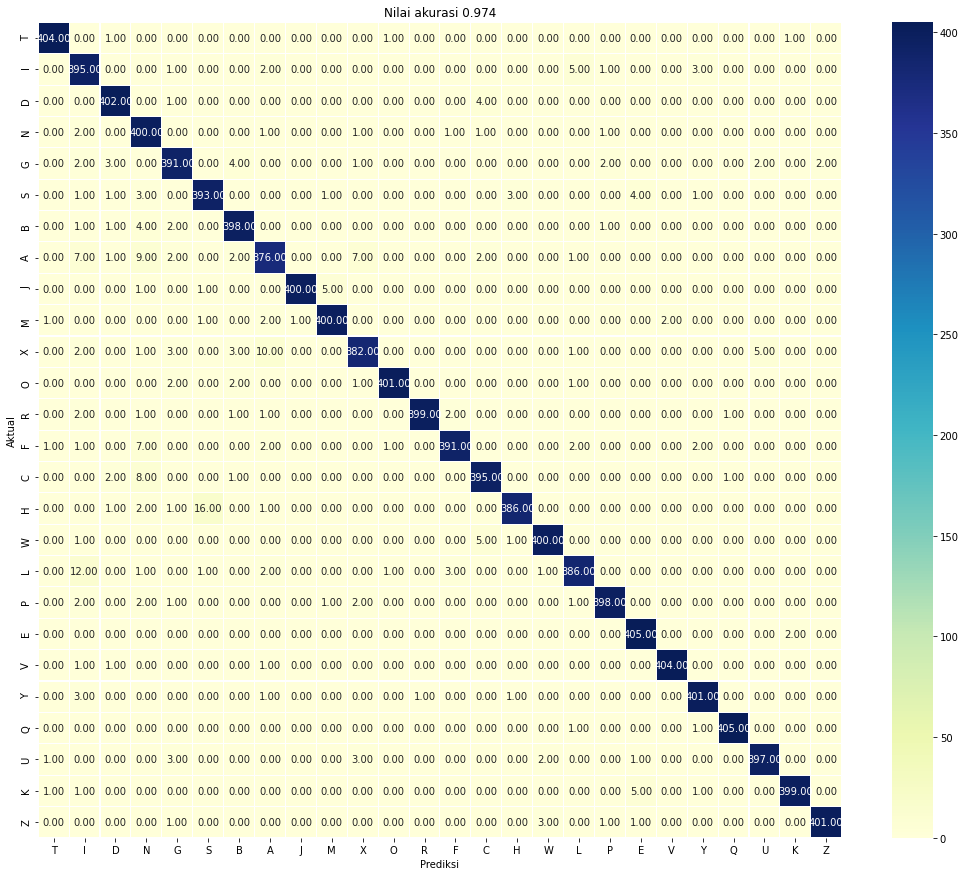

Nilai akurasi untuk K = 20 adalah 92.6006426006426
classification_report
              precision    recall  f1-score   support

           A       0.95      0.97      0.96       407
           B       0.83      0.95      0.88       407
           C       0.96      0.94      0.95       407
           D       0.86      0.96      0.91       407
           E       0.89      0.92      0.91       407
           F       0.90      0.92      0.91       407
           G       0.91      0.90      0.90       407
           H       0.88      0.85      0.86       407
           I       0.94      0.92      0.93       407
           J       0.96      0.91      0.93       407
           K       0.93      0.86      0.89       407
           L       0.98      0.95      0.97       407
           M       0.96      0.93      0.95       407
           N       0.96      0.91      0.94       407
           O       0.84      0.94      0.89       407
           P       0.98      0.92      0.95       407
        

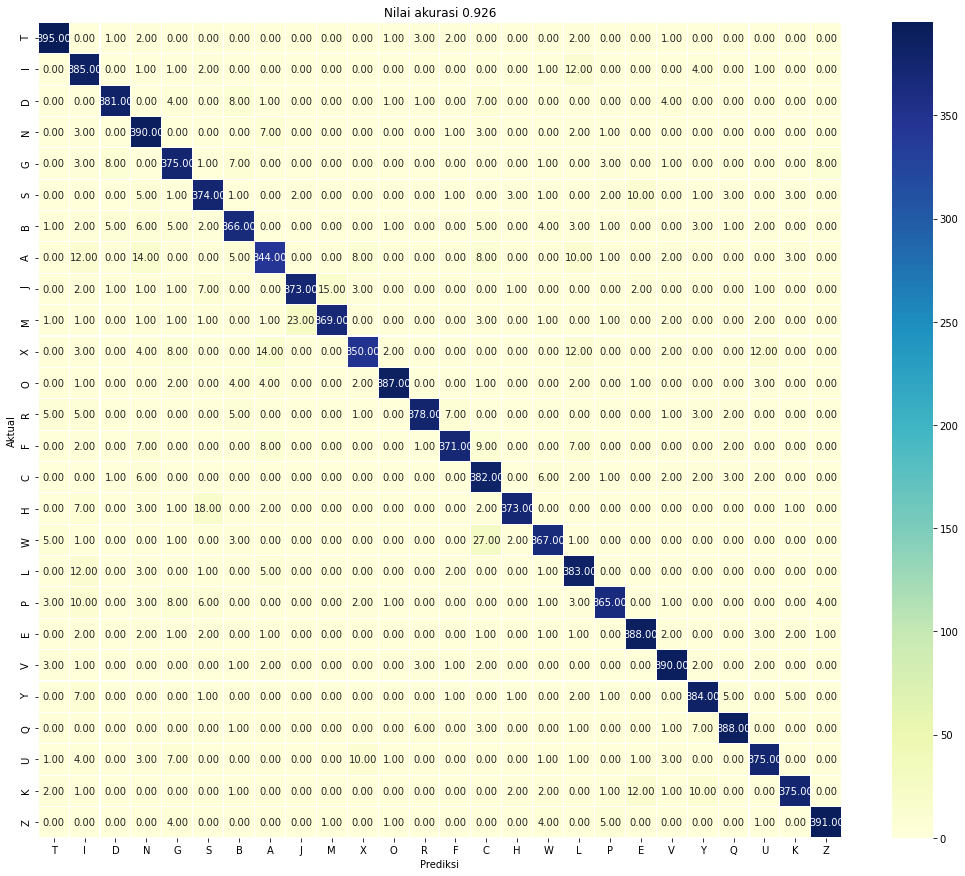

Nilai akurasi untuk K = 60 adalah 84.93668493668494
classification_report
              precision    recall  f1-score   support

           A       0.92      0.95      0.93       407
           B       0.66      0.94      0.78       407
           C       0.90      0.88      0.89       407
           D       0.78      0.87      0.83       407
           E       0.82      0.79      0.81       407
           F       0.81      0.86      0.83       407
           G       0.84      0.85      0.85       407
           H       0.79      0.66      0.72       407
           I       0.91      0.86      0.89       407
           J       0.92      0.83      0.87       407
           K       0.89      0.78      0.83       407
           L       0.96      0.88      0.92       407
           M       0.89      0.86      0.88       407
           N       0.84      0.88      0.86       407
           O       0.68      0.89      0.77       407
           P       0.94      0.83      0.88       407
       

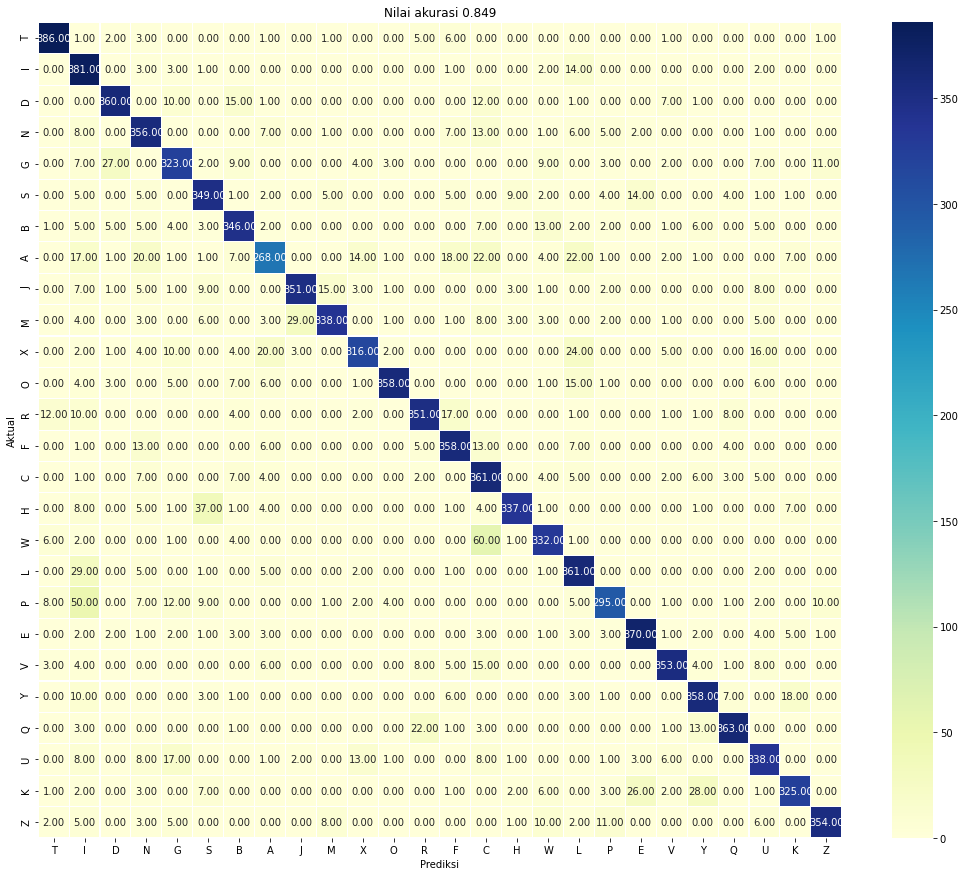

(84.93668493668494, 80.67475196291073)

In [79]:
classifier(3,True, xtrain, ytrain, xtest, ytest)
classifier(20, True, xtrain, ytrain, xtest, ytest)
classifier(60, True, xtrain, ytrain, xtest, ytest)

KNN cukup mudah diaplikasikan untuk membentuk klasifikasi sebuah data dan saat pembentukan data ini harus memerhatikan nilai K yang cocok untuk membentuk hasil data terbaik.

Referensi : https://medium.com/@avulurivenkatasaireddy/k-nearest-neighbors-and-implementation-on-iris-data-set-f5817dd33711